In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'ASIANPAINT.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,21.367001,22.466999,21.367001,22.287001,16.432615,87810
2002-07-02,21.370001,22.783001,21.370001,22.520000,16.604404,588615
2002-07-03,22.267000,22.799999,21.933001,22.733000,16.761459,162075
2002-07-04,22.667000,23.333000,22.667000,22.966999,16.933992,266625
2002-07-05,23.400000,25.000000,23.333000,24.056999,17.737665,408600
...,...,...,...,...,...,...
2024-06-20,2885.000000,2924.500000,2872.399902,2915.500000,2915.500000,1129752
2024-06-21,2925.000000,2928.000000,2880.100098,2890.850098,2890.850098,1722379
2024-06-24,2883.000000,2899.949951,2871.399902,2896.050049,2896.050049,892125


In [37]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(8, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(4, return_sequences=False))
model.add(Dense(2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=100)

[array([0.00042582, 0.00049135, 0.00055125, 0.00061707, 0.00092363,
       0.00104907, 0.00099395, 0.00103782, 0.00092363, 0.00085332,
       0.00069188, 0.00067613, 0.00046969, 0.00048938, 0.00035269,
       0.00040894, 0.00041907, 0.00045   , 0.00064238, 0.00055688])]
[0.00041175296228824435]

[array([0.00042582, 0.00049135, 0.00055125, 0.00061707, 0.00092363,
       0.00104907, 0.00099395, 0.00103782, 0.00092363, 0.00085332,
       0.00069188, 0.00067613, 0.00046969, 0.00048938, 0.00035269,
       0.00040894, 0.00041907, 0.00045   , 0.00064238, 0.00055688]), array([0.00049135, 0.00055125, 0.00061707, 0.00092363, 0.00104907,
       0.00099395, 0.00103782, 0.00092363, 0.00085332, 0.00069188,
       0.00067613, 0.00046969, 0.00048938, 0.00035269, 0.00040894,
       0.00041907, 0.00045   , 0.00064238, 0.00055688, 0.00041175])]
[0.00041175296228824435, 0.0002100953615294431]

Epoch 1/100
517/517 [==============================] - 17s 20ms/step - loss: 0.0071
Epoch 2/100
517/517 [========

In [38]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

162/162 [==============================] - 5s 8ms/step


0.9994494893831636

In [39]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

9/9 [==============================] - 0s 8ms/step


0.9607476117825421

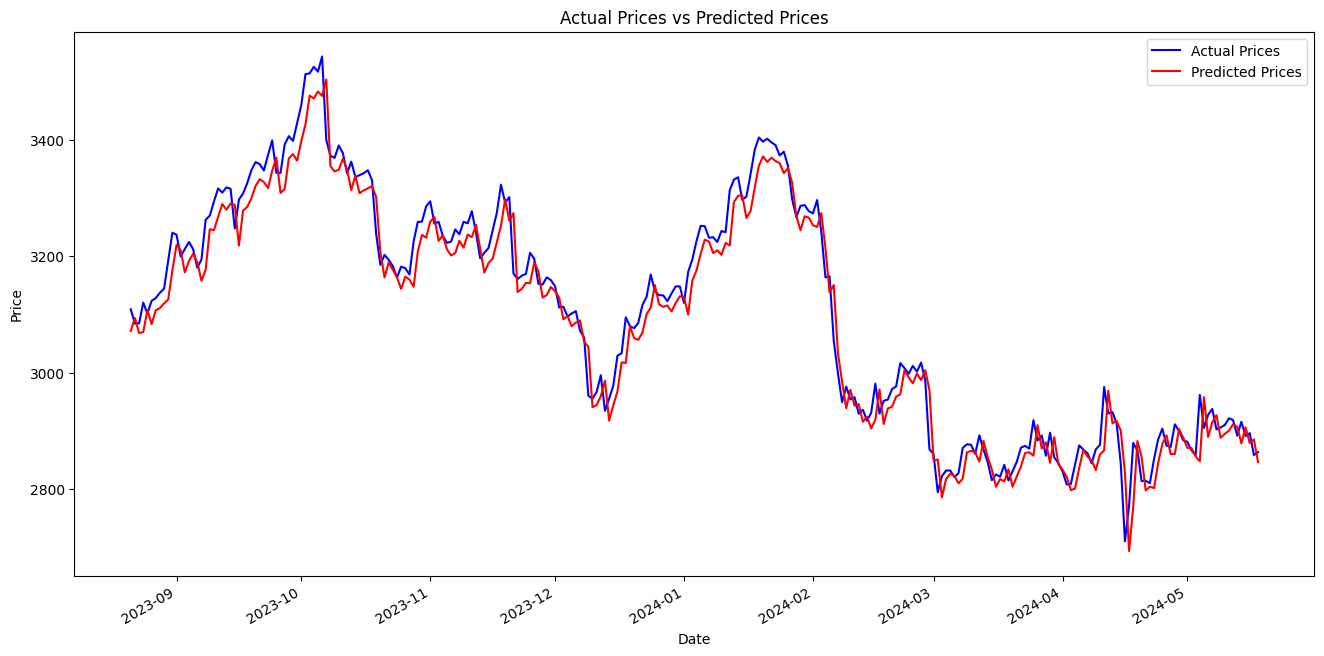

In [40]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [41]:
import joblib


model_file_path = '12.joblib'
scaler_file_path = 'scaler12.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 12.joblib
Scaler saved to scaler12.joblib
